 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing necessary libraries 📚 </center>
    </h1>
 
</div> 

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import isnan
from pandas import read_csv
from datetime import date
import warnings
warnings.filterwarnings('ignore')


<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>importing Dataset  ⬇️  </center>
    </h1>
 
</div> 

In [2]:
df=pd.read_csv('dataA_fill.csv')

In [3]:
df

,Num,Time,City,Value
0,0,2017/1/1 0:00,A,3.900242
1,1,2017/1/1 1:00,A,2.520269
2,2,2017/1/1 2:00,A,1.489956
3,3,2017/1/1 3:00,A,0.896120
4,4,2017/1/1 4:00,A,0.608650
...,...,...,...,...
16411,16411,2018/11/15 19:00,A,18.345204
16412,16412,2018/11/15 20:00,A,25.808133
16413,16413,2018/11/15 21:00,A,25.964320
16414,16414,2018/11/15 22:00,A,25.336504


In [8]:
df.Value


0         3.900242
1         2.520269
2         1.489956
3         0.896120
4         0.608650
           ...    
16411    18.345204
16412    25.808133
16413    25.964320
16414    25.336504
16415    23.312515
Name: Value, Length: 16416, dtype: float64

### Value : Data Transfer Rate (Mbps)



<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>DataSet Information  </center>
    </h1>
 
</div> 

In [47]:
df.head()


,Num,Time,City,Value
0,0,2017/1/1 0:00,A,3.900242
1,1,2017/1/1 1:00,A,2.520269
2,2,2017/1/1 2:00,A,1.489956
3,3,2017/1/1 3:00,A,0.896120
4,4,2017/1/1 4:00,A,0.608650


In [48]:
df.columns

Index(['Num', 'Time', 'City', 'Value'], dtype='object')

In [49]:
print(df.shape)

(16416, 4)


In [50]:
df.dtypes

Num        int64
Time      object
City      object
Value    float64
dtype: object

In [51]:
df.isnull().sum()

Num      0
Time     0
City     0
Value    0
dtype: int64

In [52]:
#Pourcentage des valeurs null
(df.isnull().sum()/df.shape[0])*100

Num      0.0
Time     0.0
City     0.0
Value    0.0
dtype: float64

In [53]:
all_none_columns = []
for col in df.columns:
    if df[col].isnull().all():
        all_none_columns.append(col)
# Print the names of the columns that have all None values
print('Columns with all None values:', all_none_columns)

Columns with all None values: []


<div style='font-size:100%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Discovering the dataset 🔎 </center>
    </h1>
</div> 

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,16416.0,8207.500000,4739.035345,0.000000,4103.750000,8207.50000,12311.250000,16415.000000
Value,16416.0,7.334748,5.620054,0.029778,3.060005,5.62513,10.167838,30.482362


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Visualizing and cleaning Outliers 📊</center>
    </h1>
</div>

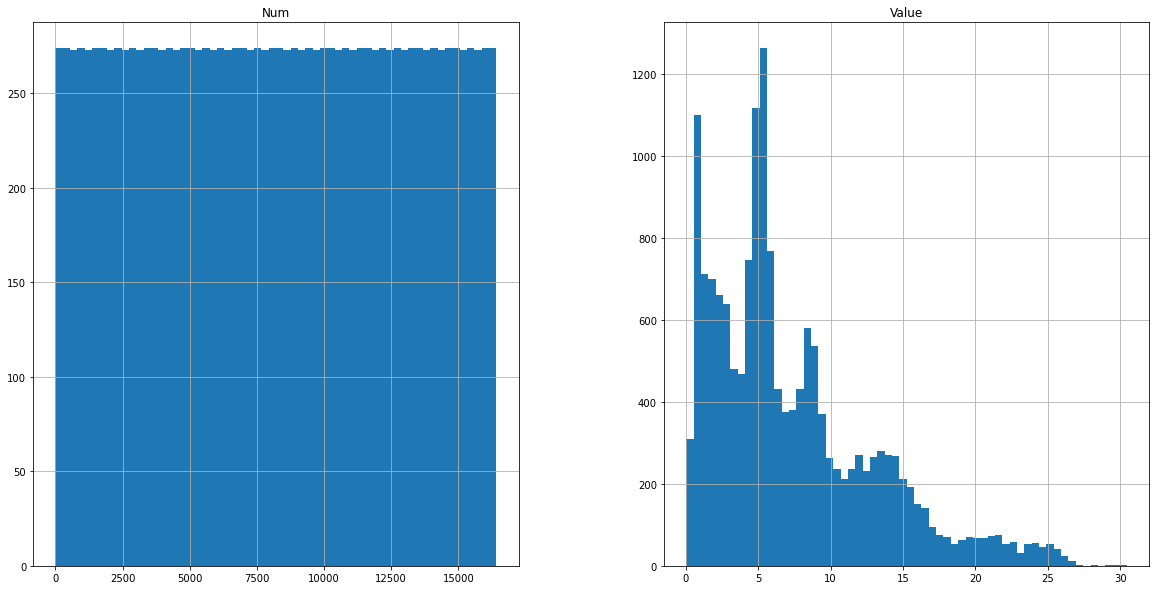

In [55]:
hist = df.hist(bins=60 , figsize=(20,10))

<AxesSubplot:>

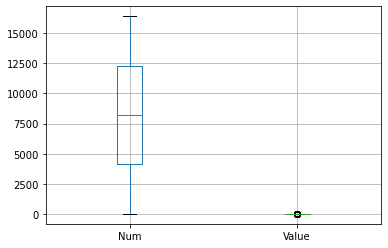

In [56]:
df.boxplot()

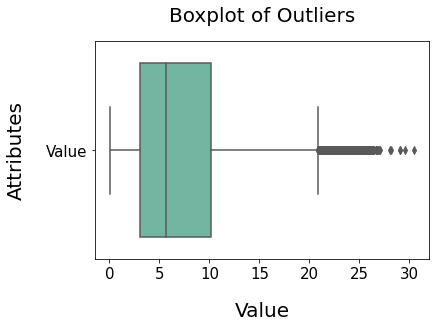

In [57]:
column=['Value','Time', 'City']
ax = sns.boxplot(data = df[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

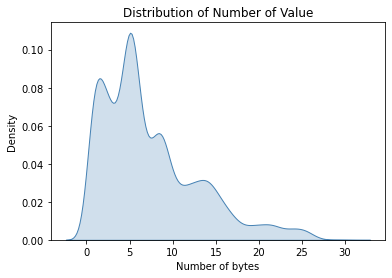

In [62]:
sns.kdeplot(df['Value'], shade=True, color='steelblue')
plt.xlabel('Number of bytes')
plt.ylabel('Density')
plt.title('Distribution of Number of Value')
plt.show()


In [7]:
##df['bytes'].value_counts(sort=False).plot.bar(figsize=(10,6), 
                                                    ## title="Frequency of molecules according to their number of rings", 
                                                    ## xlabel='Number of num rings',
                                                    ## ylabel='Absolute frequency',
                                                    ## rot=0,
                                                    ## edgecolor='k')
##plt.show()##

 <div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Feature Engineering 📊</center>
    </h1>
</div>

In [12]:
from datetime import datetime
date_format = "%Y/%m/%d %H:%M"
datetime_feature = df.Time.apply(lambda x: datetime.strptime(x, date_format))

In [14]:
datetime_feature

0       2017-01-01 00:00:00
1       2017-01-01 01:00:00
2       2017-01-01 02:00:00
3       2017-01-01 03:00:00
4       2017-01-01 04:00:00
                ...        
16411   2018-11-15 19:00:00
16412   2018-11-15 20:00:00
16413   2018-11-15 21:00:00
16414   2018-11-15 22:00:00
16415   2018-11-15 23:00:00
Name: Time, Length: 16416, dtype: datetime64[ns]

In [15]:
df

,Num,Time,City,Value
0,0,2017/1/1 0:00,A,3.900242
1,1,2017/1/1 1:00,A,2.520269
2,2,2017/1/1 2:00,A,1.489956
3,3,2017/1/1 3:00,A,0.896120
4,4,2017/1/1 4:00,A,0.608650
...,...,...,...,...
16411,16411,2018/11/15 19:00,A,18.345204
16412,16412,2018/11/15 20:00,A,25.808133
16413,16413,2018/11/15 21:00,A,25.964320
16414,16414,2018/11/15 22:00,A,25.336504


In [17]:
df['datetime']=datetime_feature

In [19]:
df

,Num,Time,City,Value,Year,Month,Date_no,Hour,datetime
0,0,2017/1/1 0:00,A,3.900242,2017,1,1,0,2017-01-01 00:00:00
1,1,2017/1/1 1:00,A,2.520269,2017,1,1,1,2017-01-01 01:00:00
2,2,2017/1/1 2:00,A,1.489956,2017,1,1,2,2017-01-01 02:00:00
3,3,2017/1/1 3:00,A,0.896120,2017,1,1,3,2017-01-01 03:00:00
4,4,2017/1/1 4:00,A,0.608650,2017,1,1,4,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
16411,16411,2018/11/15 19:00,A,18.345204,2018,11,15,19,2018-11-15 19:00:00
16412,16412,2018/11/15 20:00,A,25.808133,2018,11,15,20,2018-11-15 20:00:00
16413,16413,2018/11/15 21:00,A,25.964320,2018,11,15,21,2018-11-15 21:00:00
16414,16414,2018/11/15 22:00,A,25.336504,2018,11,15,22,2018-11-15 22:00:00


In [21]:
df["Year"]= df['datetime'].dt.year
df["Month"]= df['datetime'].dt.month
df["Date_no"]= df['datetime'].dt.day
df["Hour"]= df['datetime'].dt.hour
df["Day"]= df.datetime.dt.strftime("%A")
df.head()

,Num,Time,City,Value,Year,Month,Date_no,Hour,datetime,Day
0,0,2017/1/1 0:00,A,3.900242,2017,1,1,0,2017-01-01 00:00:00,Sunday
1,1,2017/1/1 1:00,A,2.520269,2017,1,1,1,2017-01-01 01:00:00,Sunday
2,2,2017/1/1 2:00,A,1.489956,2017,1,1,2,2017-01-01 02:00:00,Sunday
3,3,2017/1/1 3:00,A,0.896120,2017,1,1,3,2017-01-01 03:00:00,Sunday
4,4,2017/1/1 4:00,A,0.608650,2017,1,1,4,2017-01-01 04:00:00,Sunday


 <div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Exploratory Data Analysis📊</center>
    </h1>
</div>

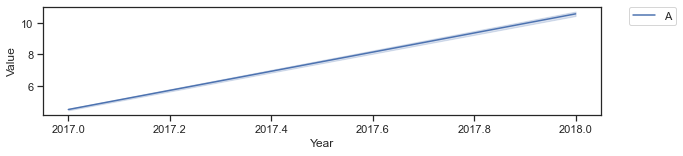

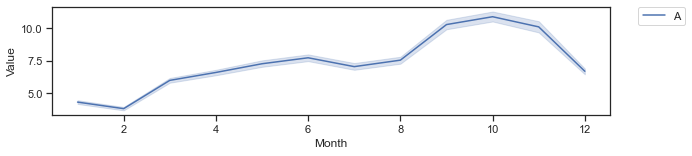

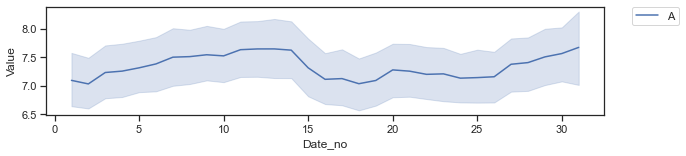

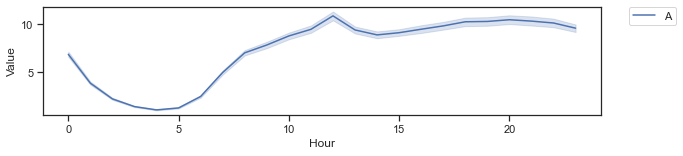

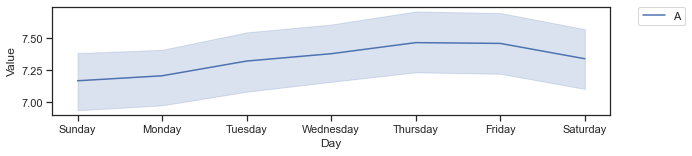

In [27]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=df[i],y="Value",data=df, hue="City" )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

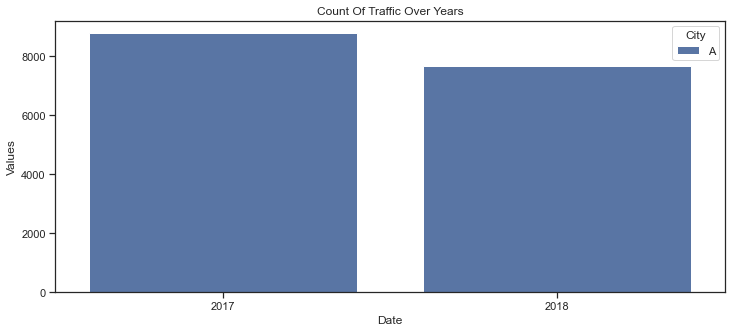

In [28]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=df, x =df["Year"], hue="City")
count.set_title("Count Of Traffic Over Years")
count.set_ylabel("Values")
count.set_xlabel("Date")

In [4]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
import pandas as pd
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
def last_n_days(df, feature, n_days):
    """
    Extract last n_days of a time series
    """
    
    return df[feature][-(24*n_days):] 


In [6]:
def plot_last_n_days(df, feature, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(last_n_days(df, feature, n_days), 'k-')
    plt.title('{0} Time Series - {1} days'
              .format(feature, n_days))
    plt.xlabel('Recorded hour')
    plt.ylabel('quantity')
    plt.grid(alpha=0.3)

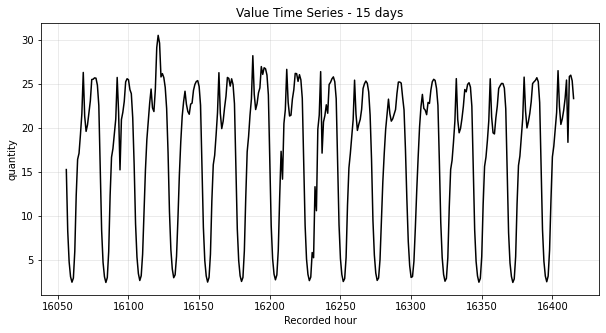

In [67]:
plot_last_n_days(df, 'Value', 15)

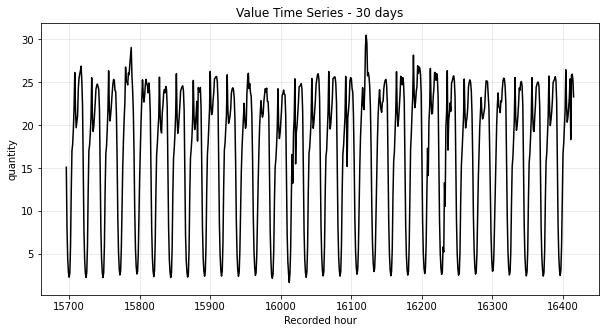

In [68]:
plot_last_n_days(df, 'Value', 30)

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["time_hour"], hue="bs")
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Preprocessing</center>
    </h1>
 
</div> 

In [7]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

In [8]:
def get_train_test_data(df, series_name, series_days, input_hours, test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    forecast_series = last_n_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [9]:
series_days = 72
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'Value', series_days, 
                         input_hours, test_hours))

In [10]:
train_y.shape

(564,)

In [11]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (564, 12, 1)
Training output shape: (564,)
Test input shape: (12,)
Test output shape: (12,)


 <div style='font-size:95%;'>
    <a id='clean'></a>
    <h1 style='color: Black; font-weight: bold; font-family: Cascadia code;'>
        <center> Normalization </center>
    </h1>
</div>

In [18]:
import numpy as np

# Calculate the mean and standard deviation of the data
mean = np.mean(train_X)
std = np.std(train_X)

# Perform normalization on the data
normalized_train_x = (train_X - mean) / std


In [25]:
normalized_train_x.shape

(564, 12, 1)

In [28]:
import numpy as np

x_train_reshaped = normalized_train_x.reshape((2, -1))
# Verify the new shape
print(x_train_reshaped.shape)

(2, 3384)


In [20]:
#Importing libraries

from sklearn import svm, tree, naive_bayes, ensemble , neighbors

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

#Import SelectKBest for Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Modeling RNN </center>
    </h1>
 
</div> 

In [13]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
     # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    losses = []
    maes = []
    
    for epoch in range(epochs):
        # Fit the model for one epoch and get the training loss
        history = model.fit(train_X, train_y, epochs=1, batch_size=64, verbose=0)
        loss = history.history['loss'][0]
        mae = history.history['mae'][0]
        # Store the loss value in the list
        losses.append(loss)
        maes.append(mae)
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss} - MAE: {mae}")

    # After training, plot the loss values
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    
     
    plt.subplot(1, 2, 2)
    plt.plot(maes, 'orange')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('MAE Curve')
    
    
    plt.show()
    
    return model



Epoch 1/10 - Loss: 373.5435485839844 - MAE: 17.582712173461914
Epoch 2/10 - Loss: 367.0977478027344 - MAE: 17.39658546447754
Epoch 3/10 - Loss: 360.3409118652344 - MAE: 17.202800750732422
Epoch 4/10 - Loss: 353.248046875 - MAE: 17.00103187561035
Epoch 5/10 - Loss: 346.0875244140625 - MAE: 16.79473114013672
Epoch 6/10 - Loss: 338.8470764160156 - MAE: 16.588306427001953
Epoch 7/10 - Loss: 332.0384521484375 - MAE: 16.385379791259766
Epoch 8/10 - Loss: 325.4108581542969 - MAE: 16.18452262878418
Epoch 9/10 - Loss: 318.655517578125 - MAE: 15.978373527526855
Epoch 10/10 - Loss: 311.2366943359375 - MAE: 15.754105567932129


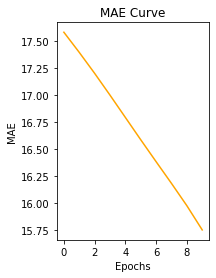

In [17]:
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

In [18]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds


In [19]:
def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

1/1 [==============================] - 0s 18ms/step


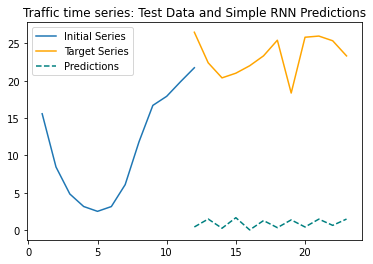

In [20]:
predict_and_plot(test_X_init, test_y, model,
                 'Traffic time series: Test Data and Simple RNN Predictions')

Epoch 1/1200 - Loss: 309.1246032714844 - MAE: 15.70865535736084
Epoch 2/1200 - Loss: 291.2266845703125 - MAE: 15.074793815612793
Epoch 3/1200 - Loss: 273.2428894042969 - MAE: 14.443930625915527
Epoch 4/1200 - Loss: 255.6815643310547 - MAE: 13.860489845275879
Epoch 5/1200 - Loss: 239.6626739501953 - MAE: 13.382193565368652
Epoch 6/1200 - Loss: 223.9494171142578 - MAE: 12.913232803344727
Epoch 7/1200 - Loss: 209.4736328125 - MAE: 12.470240592956543
Epoch 8/1200 - Loss: 197.59083557128906 - MAE: 12.094000816345215
Epoch 9/1200 - Loss: 186.6082763671875 - MAE: 11.728424072265625
Epoch 10/1200 - Loss: 175.8726348876953 - MAE: 11.364148139953613
Epoch 11/1200 - Loss: 166.03961181640625 - MAE: 11.037018775939941
Epoch 12/1200 - Loss: 156.8865966796875 - MAE: 10.725760459899902
Epoch 13/1200 - Loss: 146.74050903320312 - MAE: 10.374938011169434
Epoch 14/1200 - Loss: 140.23092651367188 - MAE: 10.136210441589355
Epoch 15/1200 - Loss: 135.1201171875 - MAE: 9.945619583129883
Epoch 16/1200 - Loss: 1

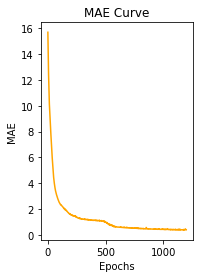

1/1 [==============================] - 0s 19ms/step


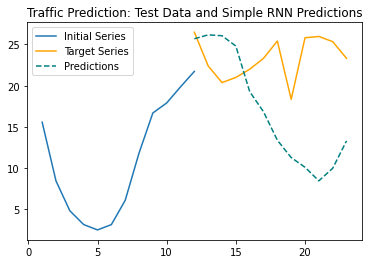

In [21]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
predict_and_plot(test_X_init, test_y, model,
                 'Traffic Prediction: Test Data and Simple RNN Predictions')

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3000 - Loss: 283.2947998046875 - MAE: 14.873235702514648
Epoch 2/3000 - Loss: 233.15570068359375 - MAE: 13.133213996887207
Epoch 3/3000 - Loss: 194.15072631835938 - MAE: 11.93729305267334
Epoch 4/3000 - Loss: 161.09756469726562 - MAE: 10.891050338745117
Epoch 5/3000 - Loss: 135.7073974609375 - MAE: 9.956231117248535
Epoch 6/3000 - Loss: 119.64186096191406 - MAE: 9.323735237121582
Epoch 7/3000 - Loss: 108.90107727050781 - MAE: 8.87864875793457
Epoch 8/3000 - Loss: 99.81285858154297 - MAE: 8.449201583862305
Epoch 9/3000 - Loss: 91.28185272216797 - MAE: 7.994073867797852
Epoch 10/3000 - Loss: 83.6183090209961 - MAE: 7.576623916625977
Epoch 11/3000 - Loss: 76.39224243164062 - MAE: 7.187494277954102
Epoch 12/3000 - Loss: 69.34990692138672 - MAE: 6.777374744415283
Epoch 13/3000 - Loss: 62.22438049316406 - MAE: 6.351081371307373
Epoch 14/3000 - Loss: 56.733577728271484 - MAE: 6.004086494445801
Epoch 15/3000 - Loss: 51.858455657958984 - MAE: 5.652866363525391
Epoch 16/3000 - Loss: 47.3

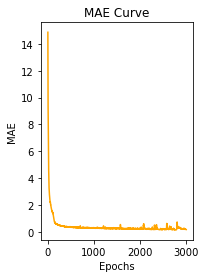

1/1 [==============================] - 0s 20ms/step


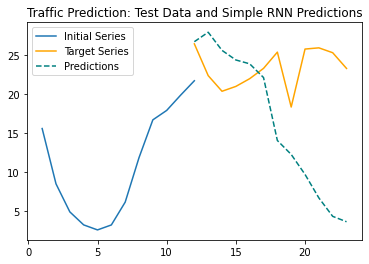

In [22]:
model = fit_SimpleRNN(train_X, train_y, cell_units=70, epochs=3000)
predict_and_plot(test_X_init, test_y, model,
                 'Traffic Prediction: Test Data and Simple RNN Predictions')

In [51]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 70)                5040      
                                                                 
 dense_9 (Dense)             (None, 1)                 71        
                                                                 
Total params: 5,111
Trainable params: 5,111
Non-trainable params: 0
_________________________________________________________________


 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Modeling LSTM </center>
    </h1>
 
</div> 

In [23]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    losses = []
    maes = []
    
    for epoch in range(epochs):
        # Fit the model for one epoch and get the training loss
        history = model.fit(train_X, train_y, epochs=1, batch_size=64, verbose=0)
        loss = history.history['loss'][0]
        mae = history.history['mae'][0]
        
        # Store the loss value in the list
        losses.append(loss)
        maes.append(mae)
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss} - MAE: {mae}")

   # After training, plot the loss and MAE values
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    
    plt.subplot(1, 2, 2)
    plt.plot(maes, 'orange')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('MAE Curve')
    
    plt.show()
    
    return model

Epoch 1/3000 - Loss: 258.8977966308594 - MAE: 14.21784782409668
Epoch 2/3000 - Loss: 200.8026123046875 - MAE: 12.025226593017578
Epoch 3/3000 - Loss: 160.27685546875 - MAE: 10.6754789352417
Epoch 4/3000 - Loss: 129.2793731689453 - MAE: 9.67447280883789
Epoch 5/3000 - Loss: 103.79488372802734 - MAE: 8.828311920166016
Epoch 6/3000 - Loss: 85.22640991210938 - MAE: 8.091056823730469
Epoch 7/3000 - Loss: 72.55602264404297 - MAE: 7.514862537384033
Epoch 8/3000 - Loss: 64.47465515136719 - MAE: 7.070716381072998
Epoch 9/3000 - Loss: 58.215606689453125 - MAE: 6.677614688873291
Epoch 10/3000 - Loss: 53.16499710083008 - MAE: 6.340177059173584
Epoch 11/3000 - Loss: 48.9019889831543 - MAE: 6.053496837615967
Epoch 12/3000 - Loss: 45.232906341552734 - MAE: 5.793015480041504
Epoch 13/3000 - Loss: 41.35698699951172 - MAE: 5.503574371337891
Epoch 14/3000 - Loss: 37.395484924316406 - MAE: 5.212928771972656
Epoch 15/3000 - Loss: 33.07843780517578 - MAE: 4.857640266418457
Epoch 16/3000 - Loss: 29.102424621

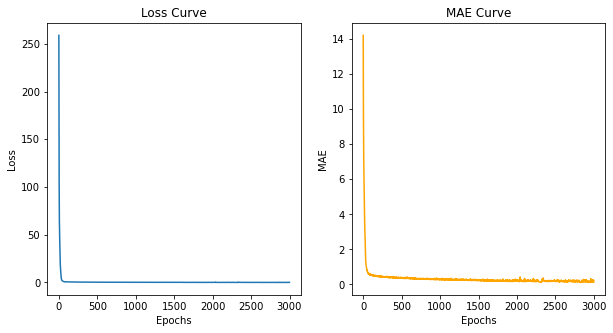

1/1 [==============================] - 0s 24ms/step


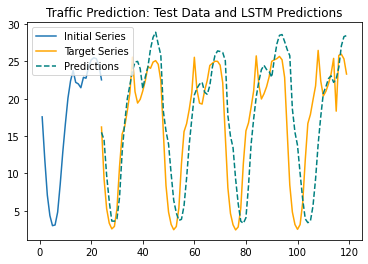

In [24]:
series_days = 100
input_hours = 24
test_hours = 120

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'Value', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=70, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Traffic Prediction: Test Data and LSTM Predictions')


<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Modeling GRU </center>
    </h1>
 
</div>

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def fit_GRU(train_X, train_y, cell_units, epochs):
    """
    Fit a GRU model to data train_X, train_y
    
    arguments
    ---------
    train_X (array): input sequence samples for training
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for GRU cells
    epochs (int): number of training epochs
    """
    
    # Initialize the model
    model = Sequential()
    
    # Construct a GRU layer with the specified number of hidden units
    # per cell and the desired sequence input format
    model.add(GRU(cell_units, input_shape=(train_X.shape[1], 1)))
    
    # Add an output layer to make final predictions
    model.add(Dense(1))
    
    # Define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs)
    model.compile(loss='mean_squared_error', optimizer='adam')
    losses = []
    
    for epoch in range(epochs):
        # Fit the model for one epoch and get the training loss
        history = model.fit(train_X, train_y, epochs=1, batch_size=64, verbose=0)
        loss = history.history['loss'][0]
        
        # Store the loss value in the list
        losses.append(loss)
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss}")

    # After training, plot the loss values
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()
    
    return model


Epoch 1/2000 - Loss: 270.3252868652344
Epoch 2/2000 - Loss: 216.5203857421875
Epoch 3/2000 - Loss: 166.22120666503906
Epoch 4/2000 - Loss: 124.05176544189453
Epoch 5/2000 - Loss: 97.9411392211914
Epoch 6/2000 - Loss: 82.59085845947266
Epoch 7/2000 - Loss: 72.57068634033203
Epoch 8/2000 - Loss: 64.74895477294922
Epoch 9/2000 - Loss: 56.9925651550293
Epoch 10/2000 - Loss: 50.97947692871094
Epoch 11/2000 - Loss: 46.08137512207031
Epoch 12/2000 - Loss: 41.81425476074219
Epoch 13/2000 - Loss: 38.15782928466797
Epoch 14/2000 - Loss: 35.085662841796875
Epoch 15/2000 - Loss: 32.302730560302734
Epoch 16/2000 - Loss: 29.73276710510254
Epoch 17/2000 - Loss: 27.4760684967041
Epoch 18/2000 - Loss: 25.383554458618164
Epoch 19/2000 - Loss: 23.545150756835938
Epoch 20/2000 - Loss: 21.78907585144043
Epoch 21/2000 - Loss: 20.231229782104492
Epoch 22/2000 - Loss: 18.821138381958008
Epoch 23/2000 - Loss: 17.563505172729492
Epoch 24/2000 - Loss: 16.489057540893555
Epoch 25/2000 - Loss: 15.55284595489502
Ep

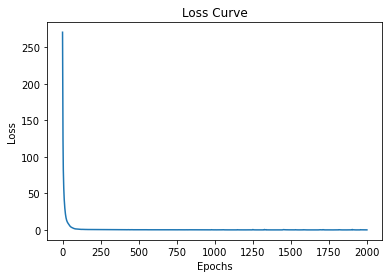

1/1 [==============================] - 0s 21ms/step


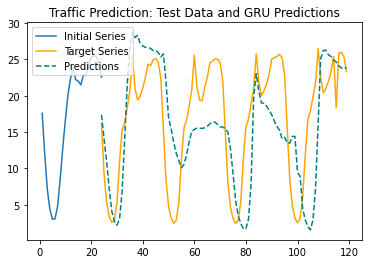

In [16]:
series_days = 100
input_hours = 24
test_hours = 120

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'Value', series_days, 
                         input_hours, test_hours))

model = fit_GRU(train_X, train_y, cell_units=50, epochs=2000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Traffic Prediction: Test Data and GRU Predictions')

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def fit_GRU(train_X, train_y, cell_units, epochs):
    """
    Fit a GRU model to data train_X, train_y
    
    arguments
    ---------
    train_X (array): input sequence samples for training
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for GRU cells
    epochs (int): number of training epochs
    """
    
    # Initialize the model
    model = Sequential()
    
    # Construct a GRU layer with the specified number of hidden units
    # per cell and the desired sequence input format
    model.add(GRU(cell_units, input_shape=(train_X.shape[1], 1)))
    
    # Add an output layer to make final predictions
    model.add(Dense(1))
    
    # Define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    losses = []
    maes = []
    
    for epoch in range(epochs):
        # Fit the model for one epoch and get the training loss and MAE
        history = model.fit(train_X, train_y, epochs=1, batch_size=64, verbose=0)
        loss = history.history['loss'][0]
        mae = history.history['mae'][0]
        
        # Store the loss and MAE values in the lists
        losses.append(loss)
        maes.append(mae)
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss} - MAE: {mae}")

    # After training, plot the loss and MAE values
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    
    plt.subplot(1, 2, 2)
    plt.plot(maes, 'orange')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('MAE Curve')
    
    plt.show()
    
    return model

Epoch 1/2000 - Loss: 211.54232788085938 - MAE: 12.635310173034668
Epoch 2/2000 - Loss: 177.04571533203125 - MAE: 11.33310604095459
Epoch 3/2000 - Loss: 145.69395446777344 - MAE: 10.172945976257324
Epoch 4/2000 - Loss: 119.0097427368164 - MAE: 9.201199531555176
Epoch 5/2000 - Loss: 100.30345916748047 - MAE: 8.511265754699707
Epoch 6/2000 - Loss: 88.82192993164062 - MAE: 8.035521507263184
Epoch 7/2000 - Loss: 79.34388732910156 - MAE: 7.546439170837402
Epoch 8/2000 - Loss: 71.4045639038086 - MAE: 7.048091888427734
Epoch 9/2000 - Loss: 64.61699676513672 - MAE: 6.601702690124512
Epoch 10/2000 - Loss: 58.43723678588867 - MAE: 6.208915710449219
Epoch 11/2000 - Loss: 52.690189361572266 - MAE: 5.835646629333496
Epoch 12/2000 - Loss: 47.65528869628906 - MAE: 5.4891862869262695
Epoch 13/2000 - Loss: 43.30119705200195 - MAE: 5.172401428222656
Epoch 14/2000 - Loss: 39.42885208129883 - MAE: 4.87891149520874
Epoch 15/2000 - Loss: 36.15921401977539 - MAE: 4.613137245178223
Epoch 16/2000 - Loss: 33.165

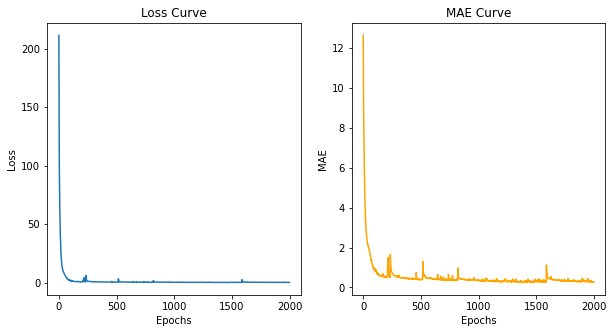

1/1 [==============================] - 0s 35ms/step


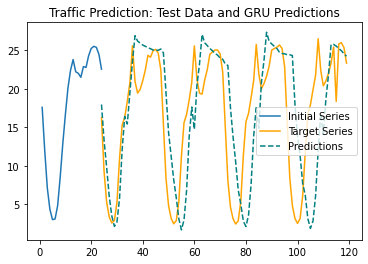

In [18]:
series_days = 100
input_hours = 24
test_hours = 120

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'Value', series_days, 
                         input_hours, test_hours))

model = fit_GRU(train_X, train_y, cell_units=50, epochs=2000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Traffic Prediction: Test Data and GRU Predictions')